Using device: cuda


100%|██████████| 50/50 [06:51<00:00,  8.23s/it]


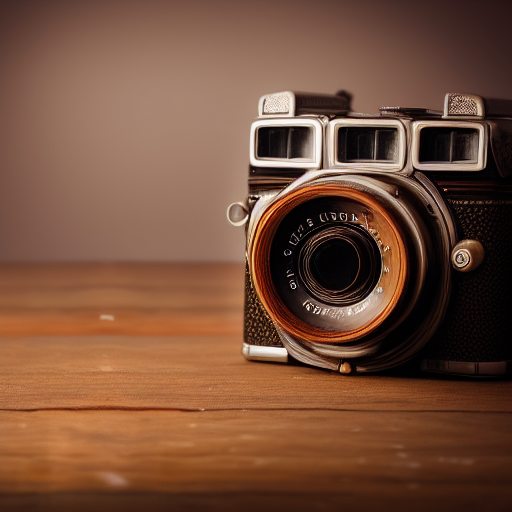

In [9]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = True
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("data/vocab.json", merges_file="data/merges.txt")
model_file = "data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE
prompt = "a realistic photo of a vintage camera on a wooden table, soft studio lighting, sharp focus, detailed textures, professional product photography"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "images/dog.jpg"
# input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.9

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)

In [ ]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
from pathlib import Path
import torch

# -----------------------
# DEVICE CONFIGURATION
# -----------------------
DEVICE = "cpu"

if torch.cuda.is_available():
    DEVICE = "cuda"

print(f"Using device: {DEVICE}")

# -----------------------
# LOAD TOKENIZER & MODELS
# -----------------------
tokenizer = CLIPTokenizer(
    "../data/vocab.json",
    merges_file="../data/merges.txt"
)

model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(
    model_file,
    DEVICE
)

# -----------------------
# GENERATION SETTINGS
# -----------------------
prompts = [
    "a realistic photo of a vintage camera on a wooden table, soft studio lighting, sharp focus, detailed textures, professional product photography",
    "a peaceful mountain landscape at sunrise, soft fog, warm light, realistic photography",
    "a cinematic photo of a quiet street in an old European city, evening light, stone buildings",
    "a futuristic city at dusk, glowing lights, atmospheric haze, sci-fi environment",
    "a realistic photo of a cup of coffee on a wooden table, morning sunlight, shallow depth of field"
]

negative_prompt = ""
cfg_scale = 8.0
num_inference_steps = 50
sampler = "ddpm"
base_seed = 42

# -----------------------
# OUTPUT DIRECTORY
# -----------------------
output_dir = Path("outputs")
output_dir.mkdir(exist_ok=True)

# -----------------------
# GENERATE IMAGES
# -----------------------
generated_images = []

for i, prompt in enumerate(prompts):
    print(f"Generating image {i + 1} / {len(prompts)}")

    image = pipeline.generate(
        prompt=prompt,
        uncond_prompt=negative_prompt,
        input_image=None,          # txt2img
        strength=0.9,
        do_cfg=True,
        cfg_scale=cfg_scale,
        sampler_name=sampler,
        n_inference_steps=num_inference_steps,
        seed=base_seed + i,        # different seed per image
        models=models,
        device=DEVICE,
        idle_device="cpu",
        tokenizer=tokenizer,
    )

    pil_image = Image.fromarray(image)
    pil_image.save(output_dir / f"result_{i + 1}.png")
    generated_images.append(pil_image)

print("Generation complete. Images saved in ./outputs/")

Using device: cuda
Generating image 1 / 5


100%|██████████| 50/50 [07:14<00:00,  8.69s/it]


Generating image 2 / 5


100%|██████████| 50/50 [07:34<00:00,  9.10s/it]


Generating image 3 / 5


100%|██████████| 50/50 [07:33<00:00,  9.08s/it]


Generating image 4 / 5


100%|██████████| 50/50 [07:36<00:00,  9.13s/it]


Generating image 5 / 5


100%|██████████| 50/50 [07:36<00:00,  9.14s/it]


Generation complete. Images saved in ./outputs/
